In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
img_path = "../output_images/player_2.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

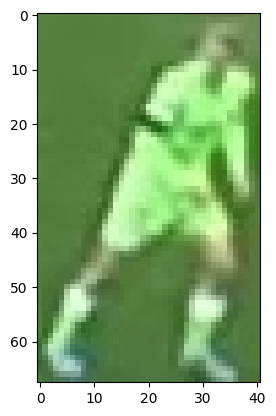

In [9]:
plt.imshow(img)
plt.show()

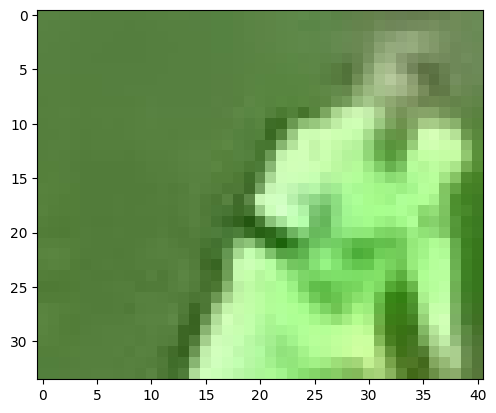

In [10]:
# Get the top half of the image
top_half_image = img[0 : int(img.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

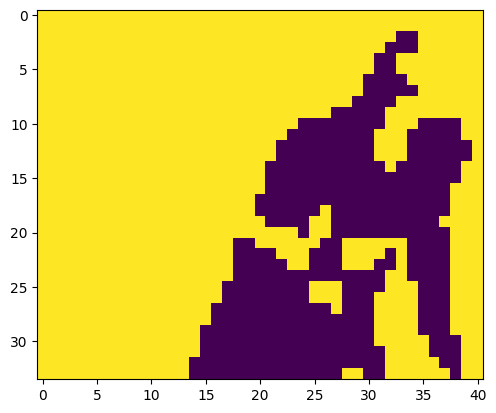

In [16]:
# Cluster Images

# Reshape the image into a 2D array
image_2d = top_half_image.reshape(-1, 3)

# Perform K-means clustering with 2 clusters
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [15]:
# Extract corner pixels from the clustered image
corner_clusters = [
    clustered_image[0, 0],
    clustered_image[0, -1],
    clustered_image[-1, 0],
    clustered_image[-1, -1],
]

# Determine the cluster representing non-players (most frequent corner cluster)
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print("Non-player cluster:", non_player_cluster)

# Determine the cluster representing players
player_cluster = 1 - non_player_cluster
print("Player cluster:", player_cluster)

# Retrieve the cluster center representing players from the KMeans model
player_cluster_center = kmeans.cluster_centers_[player_cluster]
print("Player cluster center:", player_cluster_center)

Non-player cluster: 1
Player cluster: 0
Player cluster center: [169.23341523 233.10565111 143.72235872]
